# Transportation Hub EDA

This file outlines a basic exploration of the tables we have access to, providing a space to monkey around with the underlying data.

In [2]:
# Import libraries.
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import snowflake.connector
from skimage import io

In [3]:
# Set global variables.
CREDENTIALS_FILE = 'credentials.txt'
DATABASE_ROOT = 'TRANSPORTATION_HUB.HUB'

In [4]:
# Read in Snowflake credentials.
with open(CREDENTIALS_FILE, 'r') as f:
    creds = f.readlines()
    USER = creds[0].strip()
    PASSWORD = creds[1].strip()
    ACCOUNT = creds[2].strip()

In [5]:
# Open a connection and test that it works.
con = snowflake.connector.connect(
    user=USER,
    password=PASSWORD,
    account=ACCOUNT,
)
cs = con.cursor()
cs.execute("SELECT current_version()")
one_row = cs.fetchone()
print(one_row[0])

8.21.1


### Stops Data

**Description**: 

This table details the stops on given routes used by the transportation system.

**Notes**:
* There are ~8,100 stops across 87 routes.
* Many stops have identical locations, but correspond to different routes.
* Identical stops are distinguished by their "stop location ID".

In [6]:
# Import data as a Pandas Dataframe and preview.
cs.execute(f"SELECT * FROM {DATABASE_ROOT}.STOPS")
stops_data = cs.fetch_pandas_all()
stops_data

,STOP_ID,STOP_LOCATION_ID,ROUTE_ID,STOP_DESC,LATITUDE,LONGITUDE,ROUTE_DIRECTION,STOP_SEQUENCE,TIME_POINT
0,1,2,37,A Ave & Chandler,45.420609,-122.675671,Inbound,1150,False
1,2,2,78,A Ave & Chandler,45.420609,-122.675671,Outbound,3125,False
2,3,3,35,A Ave & Second St,45.419388,-122.665197,Inbound,1550,False
3,4,3,35,A Ave & Second St,45.419388,-122.665197,Outbound,4350,False
4,5,4,37,A Ave & 10th St,45.420703,-122.675152,Outbound,150,False
...,...,...,...,...,...,...,...,...,...
8117,8118,14414,70,SE Milwaukie & Lexington,45.467400,-122.648033,Inbound,3775,False
8118,8119,14415,70,SE Milwaukie & Lexington,45.467404,-122.647879,Outbound,975,False
8119,8120,14416,17,SE 136th & Mitchell,45.485631,-122.523661,Inbound,325,False
8120,8121,14417,39,SW 35th & Coronado,45.442408,-122.712882,Inbound,325,False


In [7]:
# Count the unique stops and routes.
print(f"There are {stops_data['STOP_ID'].unique().size} unique stops.")
print(f"There are {stops_data['ROUTE_ID'].unique().size} unique routes.")

There are 8122 unique stops.
There are 87 unique routes.


In [8]:
# Check that all the stop id's are represented.
stops_data['STOP_ID'].sort_values()

0          1
1          2
2          3
3          4
4          5
        ... 
8117    8118
8118    8119
8119    8120
8120    8121
8121    8122
Name: STOP_ID, Length: 8122, dtype: int16

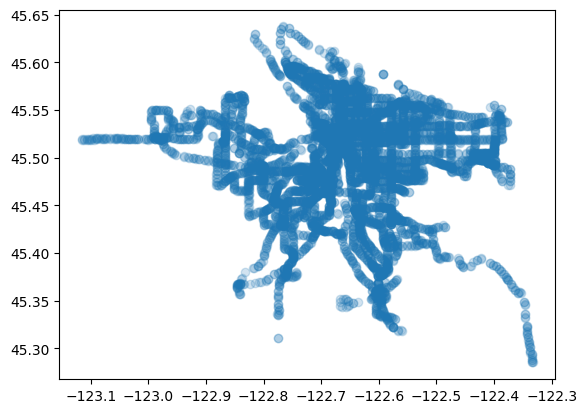

In [9]:
# Try plotting the stops.
plt.scatter(stops_data['LONGITUDE'], stops_data['LATITUDE'], alpha=0.2)

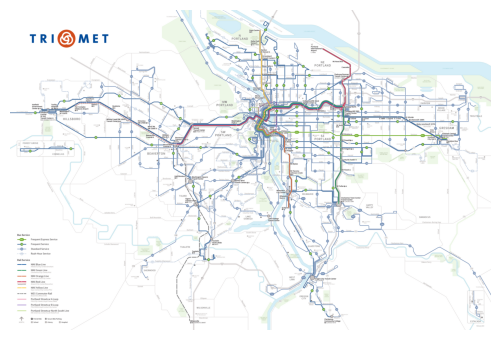

In [10]:
# Check against the actual route map
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

f = "https://trimet.org/maps/img/trimetsystem.png"
a = io.imread(f)

plt.imshow(a)
plt.axis('off')

plt.show()

### Route Shapes Data

**Description**: 

This table contains the geographic data for each route.

**Notes**:
* There are 87 unique routes with shape data.
* However, routes often (but not always) have "Inbound" and "Outbound" variations.
* This results in a total of 181 route shapes.

In [11]:
# Import data as a Pandas Dataframe and preview.
cs.execute(f"SELECT * FROM {DATABASE_ROOT}.ROUTE_SHAPES")
route_shape_data = cs.fetch_pandas_all()
route_shape_data

,ROUTE_SHAPE_ID,ROUTE_ID,DIRECTION,DIRECTION_DESC,GEOGRAPHY
0,1,1,Inbound,To Portland City Center,"{\n ""coordinates"": [\n [\n 7.63223890..."
1,2,1,Outbound,To Hayhurst and Maplewood via Vermont,"{\n ""coordinates"": [\n [\n 7.64410690..."
2,3,2,Inbound,To Portland City Center,"{\n ""coordinates"": [\n [\n [\n ..."
3,4,2,Outbound,To Gresham,"{\n ""coordinates"": [\n [\n [\n ..."
4,5,4,Inbound,To Portland City Center,"{\n ""coordinates"": [\n [\n 7.62570170..."
...,...,...,...,...,...
176,177,208,Outbound,To South Waterfront,"{\n ""coordinates"": [\n [\n 7.64220350..."
177,178,290,Inbound,To Milwaukie,"{\n ""coordinates"": [\n [\n [\n ..."
178,179,290,Outbound,To Portland City Center,"{\n ""coordinates"": [\n [\n 7.65406780..."
179,180,291,Outbound,To Milwaukie,"{\n ""coordinates"": [\n [\n [\n ..."


In [12]:
# Count the unique routes.
print(f"There are {route_shape_data['ROUTE_ID'].unique().size} unique routes.")

There are 87 unique routes.


In [13]:
# Filter down to an arbitrary route.
arbitrary_route_data = route_shape_data.loc[route_shape_data['ROUTE_SHAPE_ID'] == 1]
arbitrary_route_data

,ROUTE_SHAPE_ID,ROUTE_ID,DIRECTION,DIRECTION_DESC,GEOGRAPHY
0,1,1,Inbound,To Portland City Center,"{\n ""coordinates"": [\n [\n 7.63223890..."


In [14]:
# Extract that route's data and process into a data structure.
arbitrary_route_shape_data = json.loads(arbitrary_route_data['GEOGRAPHY'][0])
arbitrary_route_shape_data_coordinates = arbitrary_route_shape_data['coordinates']
long_vals = [x[0] for x in arbitrary_route_shape_data_coordinates]
lat_vals = [x[1] for x in arbitrary_route_shape_data_coordinates]

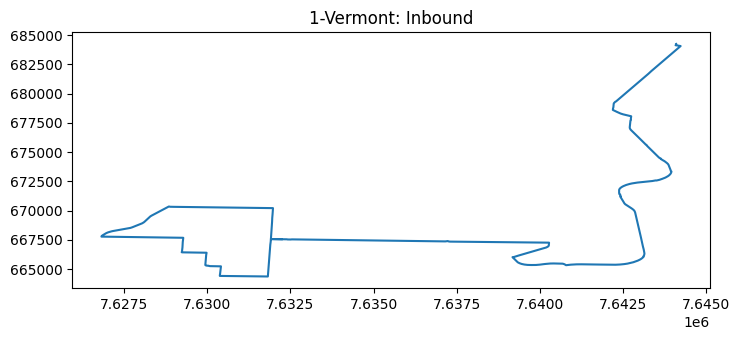

In [15]:
# Draw the route.
plot = plt.plot(long_vals, lat_vals)
plt.title('1-Vermont: Inbound')
plot

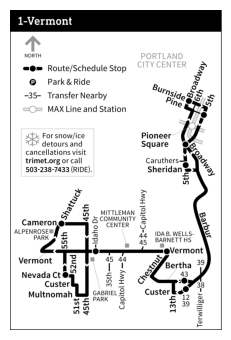

In [16]:
# Check against the actual route map
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

f = "https://trimet.org/schedules/img/001.png"
a = io.imread(f)

plt.imshow(a)
plt.axis('off')

plt.show()

### Trip Delays

In [17]:
# Import data as a Pandas Dataframe and preview.
cs.execute(f"SELECT * FROM {DATABASE_ROOT}.TRIP_DELAYS")
trip_delay_data = cs.fetch_pandas_all()
trip_delay_data

,TRIP_DELAY_ID,YEAR,MONTH,DAY,DAY_OF_WEEK,TIME,TIMESTAMP,TRIP_ID,TRIP_STOP_SEQUENCE,STOP_LOCATION_ID,DELAY
0,358857,2023,9,17,Sun,04:24:08,2023-09-17 04:24:08,12769269,1,9848,0.0
1,358926,2023,9,17,Sun,04:45:36,2023-09-17 04:45:36,12769269,8,9834,54.0
2,359022,2023,9,17,Sun,05:25:28,2023-09-17 05:25:28,12769269,22,8336,150.0
3,358871,2023,9,17,Sun,04:28:17,2023-09-17 04:28:17,12769269,1,9848,0.0
4,358909,2023,9,17,Sun,04:37:57,2023-09-17 04:37:57,12769269,5,9838,-17.0
...,...,...,...,...,...,...,...,...,...,...,...
1442288,1442256,2023,9,25,Mon,07:20:48,2023-09-25 07:20:48,12810486,11,13713,286.0
1442289,1442257,2023,9,25,Mon,07:21:04,2023-09-25 07:21:04,12810486,11,13713,287.0
1442290,1442265,2023,9,25,Mon,07:24:52,2023-09-25 07:24:52,12810486,13,13715,282.0
1442291,1442271,2023,9,25,Mon,07:27:10,2023-09-25 07:27:10,12810486,14,13716,303.0


### Agencies (TBD)

### Routes (TBD)

### Stop Schedule (TBD)

### Stop Times (TBD)

### Trips (TBD)

### Vehicles (TBD)

### Vehicle Positions (TBD)